# Step 1: Import Libraries

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Data

In [7]:
df = pd.read_csv("Superstore.csv", encoding='ISO-8859-1')

# Step 3: Basic Info

In [18]:
print(df.shape)
print(df.info())
print(df.describe())

(9994, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 1

# Step 4: Convert Dates

In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# Step 5: Check Missing & Duplicates

In [24]:
print("Missing Values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Missing Values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Duplicates: 0


# Univariate Analysis
**Categorical**

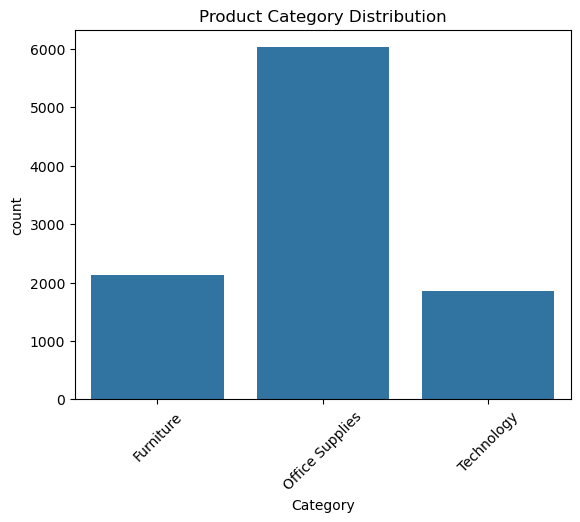

In [31]:
sns.countplot(x='Category', data=df)
plt.title("Product Category Distribution")
plt.xticks(rotation=45)
plt.show()


**Numerical**

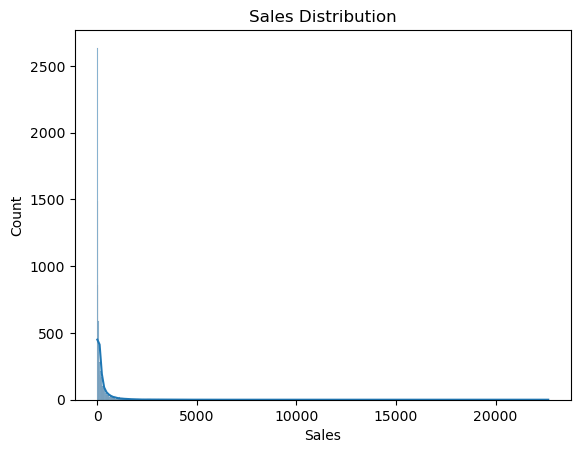

In [34]:
sns.histplot(df['Sales'], kde=True)
plt.title("Sales Distribution")
plt.show()

# Profit - Outlier Detection

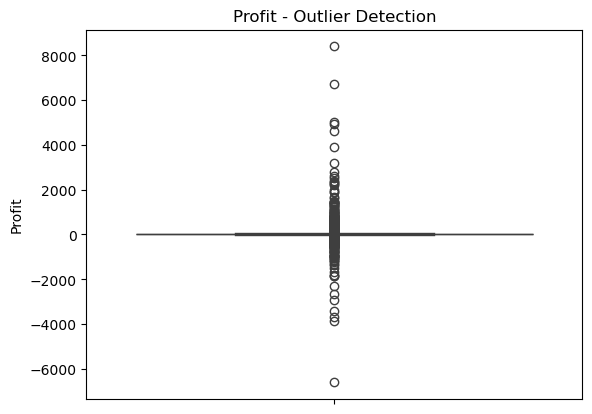

In [36]:
sns.boxplot(df['Profit'])
plt.title("Profit - Outlier Detection")
plt.show()

#  Bivariate & Correlation Analysis

**Sales vs Profit**

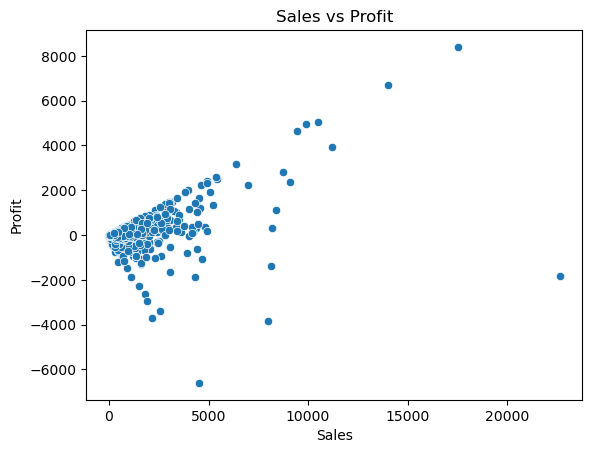

In [41]:
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title("Sales vs Profit")
plt.show()

**Correlation Matrix**

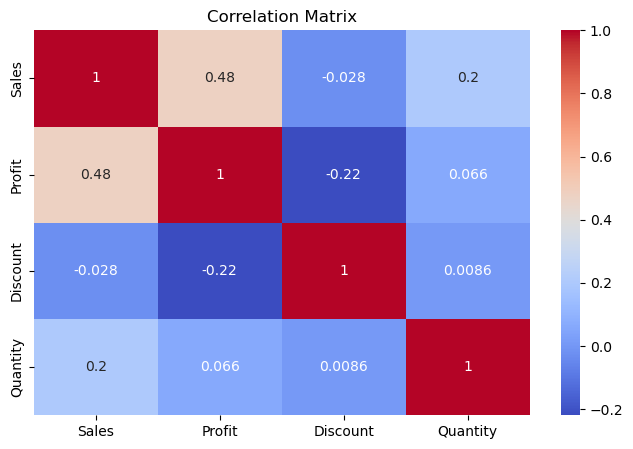

In [44]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Segment vs Profit**

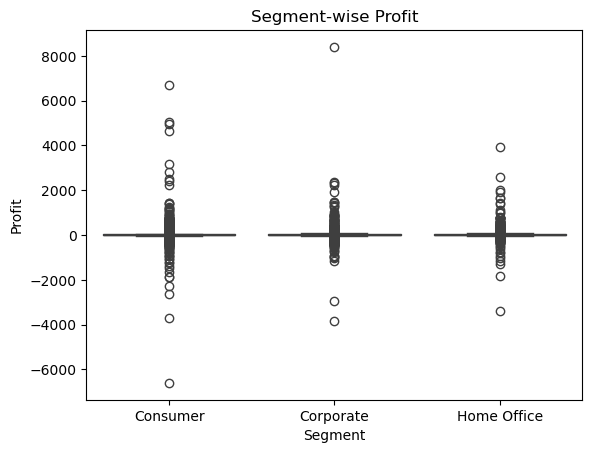

In [47]:
sns.boxplot(x='Segment', y='Profit', data=df)
plt.title("Segment-wise Profit")
plt.show()

#  Time-Based Trend
**Monthly Sales**

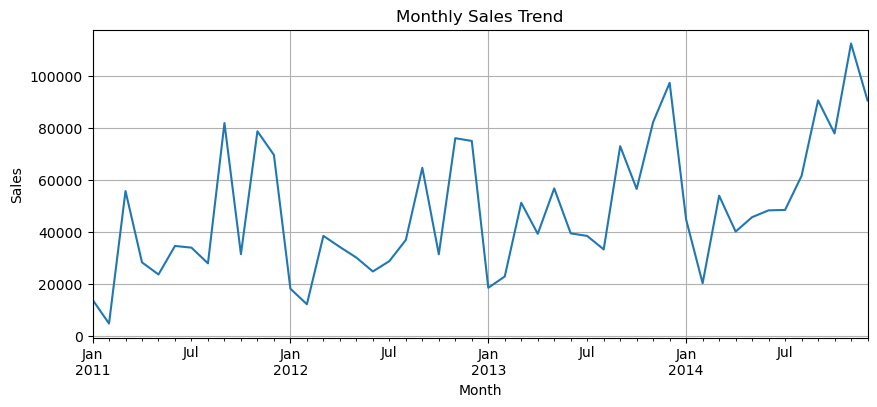

In [51]:

df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind='line', figsize=(10, 4), title="Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid()
plt.show()


# Summary Insights 

In [54]:
print("🔸 Most Sold Category:", df['Category'].value_counts().idxmax())
print("🔸 Region with Highest Sales:", df.groupby('Region')['Sales'].sum().idxmax())
print("🔸 Segment with Highest Profit:", df.groupby('Segment')['Profit'].sum().idxmax())
print("🔸 Correlation between Sales and Profit:\n", df[['Sales', 'Profit']].corr())


🔸 Most Sold Category: Office Supplies
🔸 Region with Highest Sales: West
🔸 Segment with Highest Profit: Consumer
🔸 Correlation between Sales and Profit:
            Sales    Profit
Sales   1.000000  0.479064
Profit  0.479064  1.000000
